In [1]:
import numpy as np 
import pandas as pd 

In [2]:
from subprocess import check_output


In [3]:
def datetounix(df):
    # Initialising unixtime list
    unixtime = []
    
    # Running a loop to convert Date to seconds
    for date in df['datetime']:
        unixtime.append(time.mktime(date.timetuple()))
    
    # Replacing Date with unixtime list
    df['datetime'] = unixtime
    return(df)

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from sklearn.ensemble import ExtraTreesClassifier
import operator
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense

/home/prashant/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
df_train = pd.read_csv("train.csv", encoding='ISO-8859-1', engine='c')

In [6]:
df_test = pd.read_csv("test.csv", encoding='ISO-8859-1', engine='c')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
ID                         26496 non-null int64
datetime                   26496 non-null object
temperature                26496 non-null float64
var1                       26496 non-null float64
pressure                   26496 non-null float64
windspeed                  26496 non-null float64
var2                       26496 non-null object
electricity_consumption    26496 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [8]:
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 7 columns):
ID             8568 non-null int64
datetime       8568 non-null datetime64[ns]
temperature    8568 non-null float64
var1           8568 non-null float64
pressure       8568 non-null float64
windspeed      8568 non-null float64
var2           8568 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 468.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
ID                         26496 non-null int64
datetime                   26496 non-null datetime64[ns]
temperature                26496 non-null float64
var1                       26496 non-null float64
pressure                   26496 non-null float64
windspeed                  26496 non-null float64
var2                       26496 non-null object
electricity_consumption    26496 non-null float64
dtypes: datetime64[ns](1), float64(5

In [9]:
df_test['Weekday'] = [datetime.weekday(date) for date in df_test.datetime]

In [10]:
df_test['Year'] = [date.year for date in df_test.datetime]
df_test['Month'] = [date.month for date in df_test.datetime]
df_test['Day'] = [date.day for date in df_test.datetime]

In [11]:
df_test['Time'] = [   ((date.hour*60) + date.minute)*60 + date.second  for date in df_test.datetime ]

In [12]:
df_test['Week'] = [ date.week for date in df_test.datetime ]

In [13]:
df_test['Quarter'] = [ date.quarter for date in df_test.datetime ]

In [14]:
df_train['Weekday'] = [datetime.weekday(date) for date in df_train.datetime]
df_train['Year'] = [date.year for date in df_train.datetime]
df_train['Month'] = [date.month for date in df_train.datetime]
df_train['Day'] = [date.day for date in df_train.datetime]
df_train['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in df_train.datetime]
df_train['Week'] = [date.week for date in df_train.datetime]
df_train['Quarter'] = [date.quarter for date in df_train.datetime]

In [15]:
df_test['Week'].values

array([30, 30, 30, ..., 26, 26, 26])

In [16]:
df_train.loc[ df_train.var2 == 'A', 'var2A' ] = 1
df_train.loc[df_train.var2 == 'B', 'var2B' ] = 1

In [17]:
df_train.var2A.fillna(0, inplace= True)
df_train.var2B.fillna(0, inplace= True)

In [18]:
df_train.drop(['var2'], axis=1, inplace=True)

In [19]:
df_test.loc[df_test.var2 == 'A', 'var2A'] = 1
df_test.loc[df_test.var2 == 'B', 'var2B'] = 1

df_test['var2A'].fillna(0, inplace=True)
df_test['var2B'].fillna(0, inplace=True)

df_test.drop(['var2'], axis=1, inplace=True)


In [20]:
X_test = datetounix(df_test).drop(['ID'], axis=1).values


In [21]:
type(df_test['datetime'][0])

numpy.float64

In [22]:
df_train_features = df_train.drop(['electricity_consumption', 'ID'], axis=1)

In [23]:
df_train_features = datetounix(df_train_features)

In [24]:
X = df_train_features.values

In [25]:
y = df_train['electricity_consumption'].values

In [26]:
y

array([216., 210., 225., ..., 213., 210., 210.])

In [27]:
tree_clf = ExtraTreesClassifier()

In [28]:
tree_clf.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [29]:
importances = tree_clf.feature_importances_

In [30]:
importances

array([0.14646975, 0.12245185, 0.12520323, 0.13254989, 0.14173145,
       0.05824818, 0.01637267, 0.0111208 , 0.06493294, 0.13916178,
       0.0337015 , 0.00238923, 0.00532783, 0.00033891])

In [31]:
feature_names = df_train_features.columns.tolist()

In [32]:
feature_names

['datetime',
 'temperature',
 'var1',
 'pressure',
 'windspeed',
 'Weekday',
 'Year',
 'Month',
 'Day',
 'Time',
 'Week',
 'Quarter',
 'var2A',
 'var2B']

In [33]:
feature_imp_dict = dict(zip(feature_names, importances))

In [34]:
sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)


In [35]:
indices = np.argsort(importances)[::-1]


In [36]:
indices

array([ 0,  4,  9,  3,  2,  1,  8,  5, 10,  6,  7, 12, 11, 13])

In [37]:
for f in range(X.shape[1]):
    print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

feature 0 : datetime (0.146470)
feature 4 : windspeed (0.141731)
feature 9 : Time (0.139162)
feature 3 : pressure (0.132550)
feature 2 : var1 (0.125203)
feature 1 : temperature (0.122452)
feature 8 : Day (0.064933)
feature 5 : Weekday (0.058248)
feature 10 : Week (0.033702)
feature 6 : Year (0.016373)
feature 7 : Month (0.011121)
feature 12 : var2A (0.005328)
feature 11 : Quarter (0.002389)
feature 13 : var2B (0.000339)


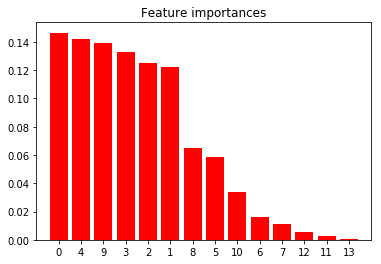

In [38]:
plt.figure(0)
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [39]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)


In [40]:
y_norm = (y - min(y))/(max(y) - min(y))
y_norm


array([0.03465347, 0.02970297, 0.04207921, ..., 0.03217822, 0.02970297,
       0.02970297])

In [41]:
classifier = Sequential()

In [42]:
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))

In [43]:
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

In [44]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [45]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

In [46]:
classifier.fit(X, y_norm, batch_size = 10, epochs = 100)

Epoch 1/100
26496/26496 [==============================] - 26s 978us/step - loss: 0.0130 - mean_absolute_error: 0.0735
Epoch 2/100
26496/26496 [==============================] - 9s 329us/step - loss: 0.0048 - mean_absolute_error: 0.0492
Epoch 3/100
26496/26496 [==============================] - 9s 344us/step - loss: 0.0046 - mean_absolute_error: 0.0483
Epoch 4/100
26496/26496 [==============================] - 10s 377us/step - loss: 0.0046 - mean_absolute_error: 0.0481
Epoch 5/100
26496/26496 [==============================] - 10s 368us/step - loss: 0.0045 - mean_absolute_error: 0.0477
Epoch 6/100
26496/26496 [==============================] - 10s 371us/step - loss: 0.0045 - mean_absolute_error: 0.0475
Epoch 7/100
26496/26496 [==============================] - 10s 372us/step - loss: 0.0045 - mean_absolute_error: 0.0473
Epoch 8/100
26496/26496 [==============================] - 11s 410us/step - loss: 0.0045 - mean_absolute_error: 0.0470
Epoch 9/100
26496/26496 [=========================

26496/26496 [==============================] - 10s 388us/step - loss: 0.0042 - mean_absolute_error: 0.0453
Epoch 70/100
26496/26496 [==============================] - 11s 415us/step - loss: 0.0042 - mean_absolute_error: 0.0453
Epoch 71/100
26496/26496 [==============================] - 10s 391us/step - loss: 0.0042 - mean_absolute_error: 0.0452
Epoch 72/100
26496/26496 [==============================] - 11s 400us/step - loss: 0.0042 - mean_absolute_error: 0.0453
Epoch 73/100
26496/26496 [==============================] - 11s 400us/step - loss: 0.0042 - mean_absolute_error: 0.0452
Epoch 74/100
26496/26496 [==============================] - 11s 422us/step - loss: 0.0042 - mean_absolute_error: 0.0452
Epoch 75/100
26496/26496 [==============================] - 12s 445us/step - loss: 0.0042 - mean_absolute_error: 0.0452
Epoch 76/100
26496/26496 [==============================] - 11s 406us/step - loss: 0.0042 - mean_absolute_error: 0.0452
Epoch 77/100
26496/26496 [===========================

In [119]:
y_pred = classifier.predict(X_test)

In [120]:
y_pred

array([[1.21803736e-04],
       [5.65405098e-05],
       [1.00841622e-04],
       ...,
       [3.46937886e-04],
       [3.03492619e-04],
       [4.98088950e-04]], dtype=float32)

In [121]:
y_pred = (y_pred * (max(y) - min(y))) + min(y)


In [122]:
predictions = [int(elem) for elem in y_pred]

In [123]:
df_solution = pd.DataFrame()
df_solution['ID'] = df_test.ID

In [124]:
df_solution['electricity_consumption'] = predictions
df_solution['electricity_consumption'].unique()

array([174, 282, 236, 232, 278, 250, 299, 269, 243, 273, 305, 276, 261,
       359, 267, 296, 353, 246, 314, 297, 316, 260, 252, 268, 235, 208,
       211, 202, 199, 198, 190, 186, 184, 241, 288, 287, 251, 289, 244,
       233, 280, 229, 295, 303, 277, 294, 265, 301, 309, 345, 304, 266,
       285, 248, 253, 264, 224, 222, 238, 245, 286, 234, 203, 200, 213,
       217, 187, 182, 185, 183, 180, 181, 179, 215, 220, 231, 210, 207,
       193, 204, 201, 194, 191, 178, 176, 175, 281, 290, 230, 262, 300,
       270, 212, 219, 214, 223, 206, 616, 575, 525, 593, 600, 528, 548,
       430, 372, 376, 337, 308, 255, 256, 218, 275, 258, 605, 621, 473,
       587, 585, 443, 607, 627, 578, 581, 615, 596, 567, 492, 503, 402,
       377, 469, 371, 424, 399, 369, 307, 346, 348, 292, 257, 263, 254,
       463, 470, 457, 477, 449, 472, 462, 453, 455, 478, 476, 480, 471,
       425, 365, 354, 324, 283, 272, 312, 306, 405, 438, 364, 361, 396,
       343, 373, 382, 351, 358, 327, 259, 271, 221, 209, 197, 18

In [127]:
df = df_test

In [128]:
df['electricity_consumption'] = predictions

In [129]:
df

,ID,datetime,temperature,var1,pressure,windspeed,Weekday,Year,Month,Day,Time,Week,Quarter,var2A,var2B,electricity_consumption
0,552,1.374604e+09,-10.0,-16.4,1011.0,263.280,2,2013,7,24,0,30,3,1.0,0.0,174
1,553,1.374608e+09,-10.0,-20.7,1011.0,267.175,2,2013,7,24,3600,30,3,1.0,0.0,174
2,554,1.374611e+09,-10.7,-17.1,1003.0,269.555,2,2013,7,24,7200,30,3,1.0,0.0,174
3,555,1.374615e+09,-13.6,-20.7,1008.0,273.060,2,2013,7,24,10800,30,3,1.0,0.0,174
4,556,1.374619e+09,-10.7,-17.1,1006.0,1.765,2,2013,7,24,14400,30,3,1.0,0.0,282
5,557,1.374622e+09,-10.7,-20.0,1009.0,2.915,2,2013,7,24,18000,30,3,1.0,0.0,236
6,558,1.374626e+09,-12.1,-20.7,997.0,6.295,2,2013,7,24,21600,30,3,1.0,0.0,232
7,559,1.374629e+09,-15.7,-17.9,1003.0,8.675,2,2013,7,24,25200,30,3,1.0,0.0,278
8,560,1.374633e+09,-12.9,-17.1,996.0,12.180,2,2013,7,24,28800,30,3,1.0,0.0,282
9,561,1.374637e+09,-10.0,-19.3,999.0,2.140,2,2013,7,24,32400,30,3,1.0,0.0,250
